## Create a Hexagon Binning Plot

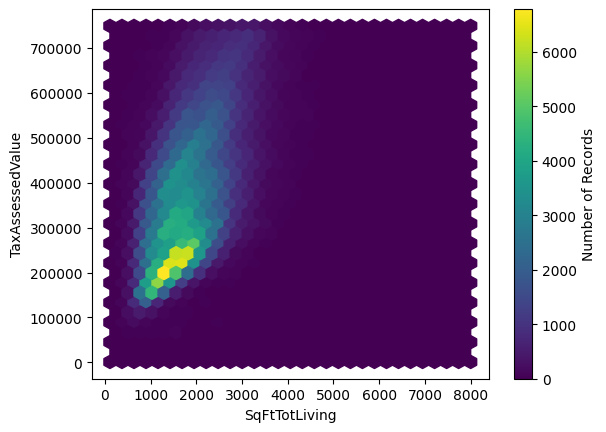

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

kc_tax_df = pd.read_csv("../data/kc_tax.csv.gz")

filtered_kc_tax_df = kc_tax_df[(kc_tax_df["TaxAssessedValue"] < 750000) & (kc_tax_df["SqFtTotLiving"] > 100)]

plt.hexbin(filtered_kc_tax_df["SqFtTotLiving"], filtered_kc_tax_df["TaxAssessedValue"], gridsize=30)
plt.colorbar(label='Number of Records')
plt.xlabel("SqFtTotLiving")
plt.ylabel("TaxAssessedValue")
plt.show()

## Create a Contour Plot

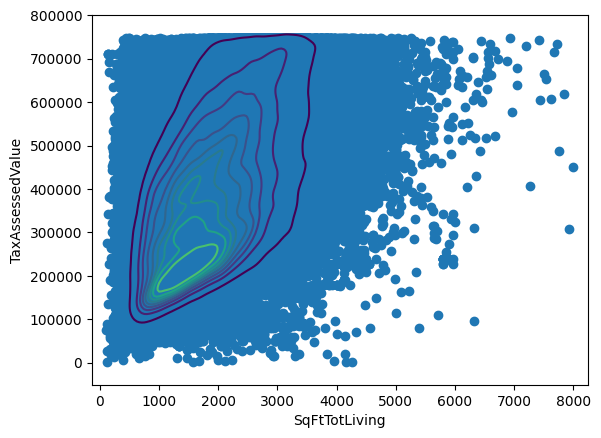

In [23]:
import numpy as np
import seaborn as sns

# Create a contour density plot
plt.scatter(filtered_kc_tax_df["SqFtTotLiving"], filtered_kc_tax_df["TaxAssessedValue"])
sns.kdeplot(x=filtered_kc_tax_df["SqFtTotLiving"], y=filtered_kc_tax_df["TaxAssessedValue"], fill=False, cmap='viridis', levels=10)
# plt.contour(filtered_kc_tax_df["SqFtTotLiving"], filtered_kc_tax_df["TaxAssessedValue"], filtered_kc_tax_df[["SqFtTotLiving", "TaxAssessedValue"]])
plt.xlabel("SqFtTotLiving")
plt.ylabel("TaxAssessedValue")
plt.show()

## Make hexagonal binnings with conditioning via zipcode

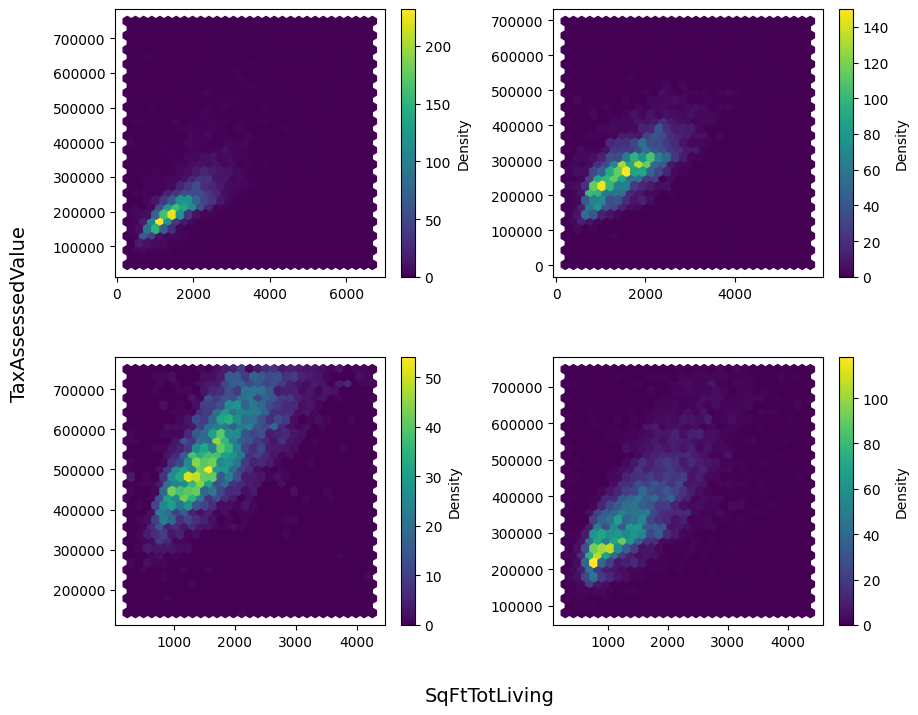

In [42]:
import numpy as np
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

def plot_hexpin(row, col, zipcode):
    hb = axes[row][col].hexbin(filtered_kc_tax_df[filtered_kc_tax_df['ZipCode'] == zipcode]["SqFtTotLiving"], filtered_kc_tax_df[filtered_kc_tax_df['ZipCode'] == zipcode]["TaxAssessedValue"], gridsize=30)
    fig.colorbar(hb, ax=axes[row][col]).set_label("Density")
plot_hexpin(0, 0, 98188)
plot_hexpin(1, 0, 98105)
plot_hexpin(0, 1, 98108)
plot_hexpin(1, 1, 98126)

# Adjust layout to add more space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add overall x and y axis labels
fig.supylabel('TaxAssessedValue', fontsize=14)
fig.supxlabel('SqFtTotLiving', fontsize=14)
plt.show()